In [1]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir

Populating the interactive namespace from numpy and matplotlib


In [6]:
target_folder = datetime.datetime.now().strftime("%m-%d-%Y")
data_folder = "/home/photon/data/"+target_folder
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [4]:
#Use this to pull from a different day:
data_folder = "/home/photon/data/07-16-2015"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [7]:
allFiles = listdir(data_folder)
allFiles.sort()
allFiles

['14-47-02_raw.npz', '14-55-09_raw.npz', '15-00-37_raw.npz']

In [8]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[-1])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

In [9]:
n = np.sqrt(ncount)
print "Std dev. of LO: ", n.std()/n.mean()
print "Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean()

Std dev. of LO:  0.00897974991224
Peak to Peak as fraction of LO mean:  0.0504788388567


In [10]:
scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [11]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

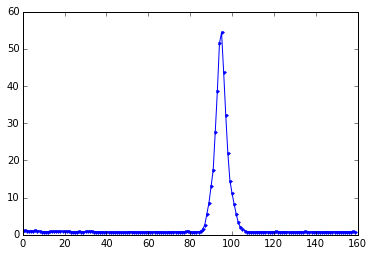

In [12]:
plot(avg_n_quick[100:260],".-")  # look at the modes with their amplitudes

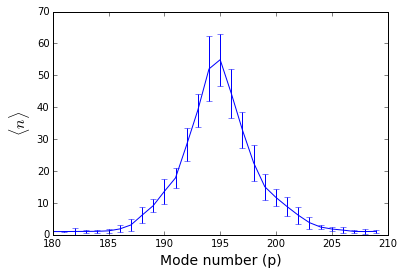

In [16]:
start = 180
stop = 210
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(start,stop):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(start,stop,1),avg_n[start:stop],yerr=std_dev_n[start:stop])
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

In [31]:
mode = 190
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = (np.abs(scaled_vc[mode,:,:]).std(axis=0))**2

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

(0, 1.4000000000000001)

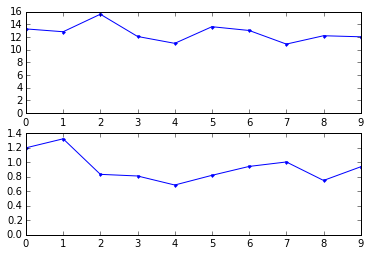

In [32]:
subplot(211)
plot(check_n,".-")
ylim(ymin=0)
subplot(212)
plot(check_var,".-")
ylim(ymin=0)

Now pick the slice of rounds to analyze

In [33]:
output = scaled_vc[mode,:,0:4].flatten('F')

In [34]:
x = np.real(output)
y = np.imag(output)

In [35]:
0.5*(np.abs(output).mean())**2  # the easy calculation

13.916314639483076

In [36]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

14.469145485541558

In [37]:
X,Y,Z = Q.kernel_estimate(x,y)

KDE kernel factor:  0.4135185542


In [38]:
print "<n_Q> = ",Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n_Q-raw> = ", Q.avg_n_raw(x,y)
print "StDev n = ", Q.std_n(X,Y,Z)
print "StDev n raw = ", Q.std_n_raw(x,y)

<n_Q> =  1357.72010844
<n_Q-raw> =  14.4691454855
StDev n =  nan
StDev n raw =  4.9369038405


In [39]:
print "Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100)
print "Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100)

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 29.79


KDE kernel factor:  0.4135185542


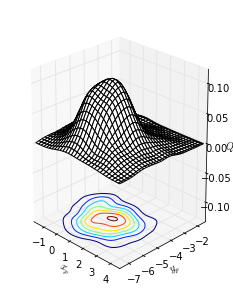

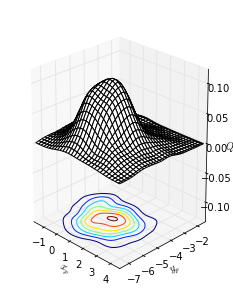

In [40]:
Q.qsurf(x,y)  # good looking figures though!

In [ ]:
Q.qfuncimage(output)